# IRWA ASSIGNMENT 3

# Group Members


IT18255720 - J.M.A.M.S Jayakody - Model: Naïve Bayes Model

IT17167710 - D.M.J Prathapa - Model: K-Nearest Neighbors Model

IT18108132 - E.N.V.Edirisinghe - Model: Support Vector Machine



In [73]:
# Import libraries

import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from bs4 import BeautifulSoup
import spacy


pip install tensorflow

pip install keras

pip install seaborn

In [74]:
# Import libraries

import string
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, Dense, GlobalMaxPool1D, Embedding, Activation
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing


# 1.	Study the selected data sets.


In [75]:
# To set path to read new.csv file
news_data=pd.read_csv('C:/Users/janit/Desktop/IRWA data Set/new.csv')

# To return top 5 rows
news_data.head()


,newsID,Genre,Title,Content_text,Views,language,link
0,1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","59,030",eng,NaN
1,2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,NaN,eng,https://images.gr-assets.com/s/1447303603m/276...
2,3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"75,867",eng,NaN
3,4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"95,009",en-US,https://images.gr-assets.com/s/1361039443m/418...
4,5,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","72,586",eng,https://images.gr-assets.com/s/1361975680m/265...


In [76]:
# Print column names
for news_col in news_data.columns: 
    print(news_col) 
    

newsID
Genre
Title
Content_text
Views
language
link


In [77]:
# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
news_data.shape


(99999, 7)

In [78]:
# To set path to read ag_news_genre.csv file
genre_data=pd.read_csv('C:/Users/janit/Desktop/IRWA data Set/ag_news_genre.csv')

# To return top rows
genre_data.head()


,id,Genre
0,1,World
1,2,Sports
2,3,Business
3,4,Science and Technology


# 2.	Select a topic

#  Content Category Recommended System

# 3.	Discuss with the lecturer about your work related to selected .

we have selected the news_data.csv as the data set. 
It consists of a large CSV file along with 1 small CSV file.
The CSV files contain all the data as comma-sparated values. 
There are 7 columns in the dataset, shuch as newsID ,Genre,Title,Content_text,Views,language and link.

The data set was initiated with sufficient data, according to the assignment principles.
The approval of choosing this data set was taken by the respected lecturer.
Moreover, the news_data data set is created according to the conceptualized theoretical procedures 
including more than 100,000 data rows

# 4.	Clean the datasets

removing special characters, html tags, digits are done in part 7

In [79]:
# Create a new column called news_content using Title and Content_text columns
news_data['news_content'] = news_data['Title'] + ' ' + news_data['Content_text']


In [80]:
# Remove Title and Content_text columns in dataset
news_data = news_data.drop(columns=['Title', 'Content_text'])


In [81]:
# Define 4 different news category names called World, Sports, Business, Science and Tech
news_genre_names=['World','Sports','Business','Science and Tech']


In [82]:
# Classify a number to each lable
#set the news categories as a key value pair
news_genre = {1:'World', 2:'Sports', 3:'Business', 4:'Science-Tech'}

# Map 'Genre' column to new 'news_label' column
news_data['news_label'] = news_data['Genre'].map(news_genre)


In [83]:
# Remove Genre Column in dataset
news_data = news_data.drop(columns=['Genre'])

# Remove link Column in dataset
news_data = news_data.drop(columns=['link'])

# Remove language Column in dataset
news_data = news_data.drop(columns=['language'])

# Remove Views Column in dataset
news_data = news_data.drop(columns=['Views'])


In [84]:
# To return top 5 rows in cleaning dataset
news_data.head()


,newsID,news_content,news_label
0,1,Wall St. Bears Claw Back Into the Black (Reute...,Business
1,2,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,4,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,5,"Oil prices soar to all-time record, posing new...",Business


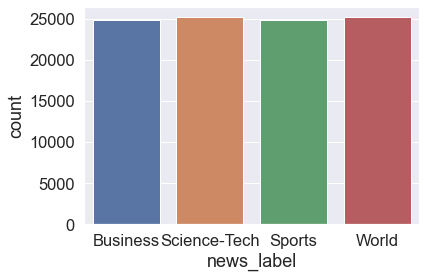

In [85]:
# Return first 99999 rows
df=news_data[:100000]

# Show the counts of observations in each each news categories
#Shows using plot the Bar chart
sns.countplot(df.news_label);


In [86]:
# shape of the dataset
# Print a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print(news_data.shape)


(99999, 3)


#WordCloud of News Articles of Different Types

# World News

In [16]:
# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
df.shape


(99999, 3)

In [17]:
# Define new variable called world_news and extract all the summary of 'World' news category
world_news = df.news_content[df.news_label[df.news_label=='World'].index]


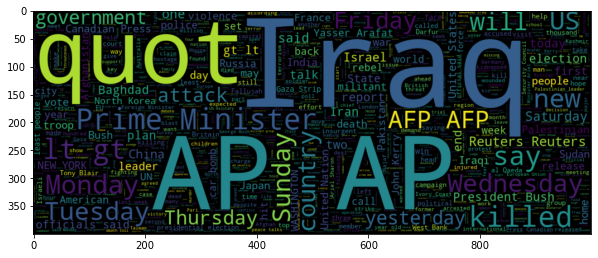

In [18]:
# Setting the width and height of the figure in inches
plt.figure(figsize = (10,15));

# Control minimum font size, maximum words, width and height of generate wordcloud using 'world' vaiable. 
world_news_wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(world_news))
plt.imshow(world_news_wordcloud,interpolation = 'bilinear');


# Sports News

In [19]:
# Define new variable called sports_news and extract all the summary of 'Sports' news category
sports_news = df.news_content[df.news_label[df.news_label=='Sports'].index]


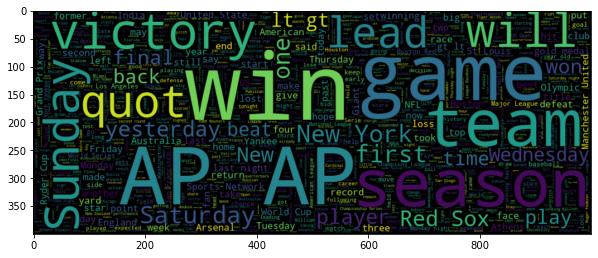

In [20]:
# Setting the width and height of the figure in inches
plt.figure(figsize = (10,15)) ;

# Control minimum font size, maximum words, width and height of generate wordcloud using 'sports' vaiable. 
sport_news_wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(sports_news))
plt.imshow(sport_news_wordcloud,interpolation = 'bilinear');


# Business News

In [21]:
# Define new variable called Business_news and extract all the summary of 'Business' news category
Business_news = df.news_content[df.news_label[df.news_label=='Business'].index]


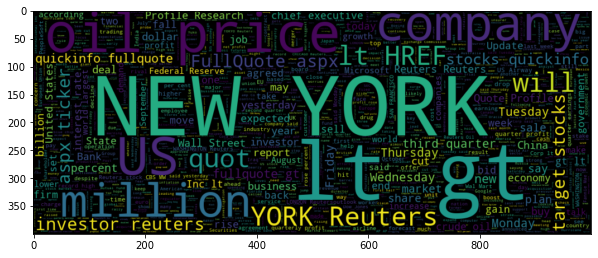

In [22]:
# Setting the width and height of the figure in inches
plt.figure(figsize = (10,15));

# Control minimum font size, maximum words, width and height of generate wordcloud using 'biz' vaiable. 
Business_news_wordcloud = WordCloud(min_font_size = 3, max_words = 2500 , width = 1000 , height = 400).generate(" ".join(Business_news))
plt.imshow(Business_news_wordcloud,interpolation = 'bilinear')


# Science and Technology News

In [23]:
# Define a new variable called sci_tech_news and extract all the summary of 'Science-Tech' news category
sci_tech_news = df.news_content[df.news_label[df.news_label=='Science-Tech'].index]


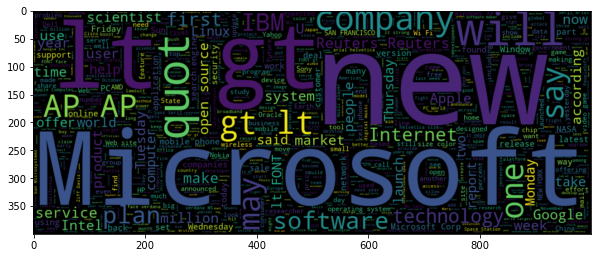

In [24]:
# Setting the width and height of the figure in inches
plt.figure(figsize = (10,15));

# Control minimum font size, maximum words, width and height of generate wordcloud using 'sci' vaiable. 
sci_tech_news_wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1000 , height = 400).generate(" ".join(sci_tech_news))
plt.imshow(sci_tech_news_wordcloud,interpolation = 'bilinear');


# Preprocessing of Data


# 5.	Tokenize the corpus

In [87]:
# Tokenization of Data
# Define a function called news_tokenization

def news_tokenization(news_text):
    
    # Splits the string in text on any consecutive runs of whitespace
    tokens=news_text.split()
    return tokens

# Apply function on news_content
news_data['news_content']=news_data['news_content'].apply(news_tokenization)


In [88]:
# To return top 5 rows in cleaning dataset
news_data.head()


,newsID,news_content,news_label
0,1,"[Wall, St., Bears, Claw, Back, Into, the, Blac...",Business
1,2,"[Carlyle, Looks, Toward, Commercial, Aerospace...",Business
2,3,"[Oil, and, Economy, Cloud, Stocks', Outlook, (...",Business
3,4,"[Iraq, Halts, Oil, Exports, from, Main, Southe...",Business
4,5,"[Oil, prices, soar, to, all-time, record,, pos...",Business


# 6.	Apply the Normalization, stemming, Lemmatization for the tokens in order to reduce the term vocabulary

# Conversion of Data to Lowercase

In [89]:
# Conversion of Data to Lowercase
# Define a function called lower_casing

def lower_casing(token_list):
    new_lower_list=[]
    for  x in  token_list:
        
        # Returns a copy of the string in which all case-based characters have been lowercased
        x=x.lower()
        new_lower_list.append(x) 
        
    return new_lower_list

#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(lower_casing)



In [90]:
# To return top 5 rows in news_content column
news_data['news_content'].head()
#news_data.head()


0    [wall, st., bears, claw, back, into, the, blac...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks', outlook, (...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, all-time, record,, pos...
Name: news_content, dtype: object

# Removal of Punctuation Symbols

In [91]:
# Removal of Punctuation Symbols
# Define a function called remove_all_punctuations

def remove_all_punctuations(new_lower_list):
    new_list=[]
    for x in new_lower_list:
        for  i in  s.punctuation:
            x=x.replace(i,'')
        new_list.append(x)
        
    return new_list

#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(remove_all_punctuations)


In [92]:
# To return top 5 rows in summary column
news_data['news_content'].head()


0    [wall, st, bears, claw, back, into, the, black...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks, outlook, re...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, alltime, record, posin...
Name: news_content, dtype: object

# Removal of Numbers(digits)

In [93]:
# Removal of Numbers(digits)
# Define a function called remove_numbers

def remove_all_numbers(word_list):
    no_digits_list=[]
    new_list=[]

    for x in  word_list:
        for y in  s.digits:
            x=x.replace(y,'')
        no_digits_list.append(x)
        
    for x in  no_digits_list:
        if  x!='':
            new_list.append(x)
            
    return new_list

#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(remove_all_numbers)



In [94]:
# To return top 5 rows in news_content column
news_data['news_content'].head()


0    [wall, st, bears, claw, back, into, the, black...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, and, economy, cloud, stocks, outlook, re...
3    [iraq, halts, oil, exports, from, main, southe...
4    [oil, prices, soar, to, alltime, record, posin...
Name: news_content, dtype: object

# should be removed those Stopwords

In [95]:
#should be removed those Stopwords
#Store all the stop words in english in words_to_stop variable

words_to_stop = stopwords.words('english')
print(words_to_stop)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [96]:
# Define a function called remove_all_stopwords

def remove_all_stopwords(wordlist):
    stop_list=stopwords.words('english')
    new_list=[]
    
    for x in wordlist:
        if x not in stop_list:
            new_list.append(x)
            
    return new_list

#Call the remove_all_stopwords function
#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(remove_all_stopwords)



In [97]:
# To return top 5 rows in news_content column
news_data['news_content'].head()


0    [wall, st, bears, claw, back, black, reuters, ...
1    [carlyle, looks, toward, commercial, aerospace...
2    [oil, economy, cloud, stocks, outlook, reuters...
3    [iraq, halts, oil, exports, main, southern, pi...
4    [oil, prices, soar, alltime, record, posing, n...
Name: news_content, dtype: object

# Lemmatization of Data

In [98]:
# Lemmatization of Data

word_lemmatizer=nltk.stem.WordNetLemmatizer()

# Define a function called words_lemmatzation

def words_lemmatzation(word_list):
    new_list=[]
    
    for x in word_list:
        x=word_lemmatizer.lemmatize(x)
        new_list.append(x)
        
    return new_list

#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(words_lemmatzation)


In [99]:
# To return top 5 rows in news_content column
news_data['news_content'].head()


0    [wall, st, bear, claw, back, black, reuters, r...
1    [carlyle, look, toward, commercial, aerospace,...
2    [oil, economy, cloud, stock, outlook, reuters,...
3    [iraq, halt, oil, export, main, southern, pipe...
4    [oil, price, soar, alltime, record, posing, ne...
Name: news_content, dtype: object

In [100]:
#download 'punkt' library
#nltk.download('punkt')


# stemming

In [101]:
#Import libraries
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer


In [102]:
#import PorterStemmer
from nltk.stem import PorterStemmer

# Define a function called PorterStemmer_funtion

def PorterStemmer_funtion(wordslist):
    stemmedwords_list=[]
    pstemmer =PorterStemmer()
    stemmedWord = ''
    
    for x in wordslist:
        stemmedWord=pstemmer.stem(x)
        stemmedwords_list.append(stemmedWord)
        
    return stemmedwords_list

#Apply function on news_content column
news_data['news_content']=news_data['news_content'].apply(words_lemmatzation)


In [103]:
# To return top 5 rows in news_content column
news_data['news_content'].head()


0    [wall, st, bear, claw, back, black, reuters, r...
1    [carlyle, look, toward, commercial, aerospace,...
2    [oil, economy, cloud, stock, outlook, reuters,...
3    [iraq, halt, oil, export, main, southern, pipe...
4    [oil, price, soar, alltime, record, posing, ne...
Name: news_content, dtype: object

In [104]:
#View index and newsID
news_data.newsID


0            1
1            2
2            3
3            4
4            5
         ...  
99994    99995
99995    99996
99996    99997
99997    99998
99998    99999
Name: newsID, Length: 99999, dtype: int64

In [105]:
#View index and summary
news_data.news_content


0        [wall, st, bear, claw, back, black, reuters, r...
1        [carlyle, look, toward, commercial, aerospace,...
2        [oil, economy, cloud, stock, outlook, reuters,...
3        [iraq, halt, oil, export, main, southern, pipe...
4        [oil, price, soar, alltime, record, posing, ne...
                               ...                        
99994    [ban, yoyo, water, ball, toy, u, group, say, w...
99995    [iran, rule, complete, nuclear, dismantling, b...
99996    [three, un, hostage, freed, unharmed, afghanis...
99997    [iraq, meeting, press, baghdad, seek, dialogue...
99998    [court, australian, suspect, al, qaeda, sleepe...
Name: news_content, Length: 99999, dtype: object

In [106]:
#View data
news_data


,newsID,news_content,news_label
0,1,"[wall, st, bear, claw, back, black, reuters, r...",Business
1,2,"[carlyle, look, toward, commercial, aerospace,...",Business
2,3,"[oil, economy, cloud, stock, outlook, reuters,...",Business
3,4,"[iraq, halt, oil, export, main, southern, pipe...",Business
4,5,"[oil, price, soar, alltime, record, posing, ne...",Business
...,...,...,...
99994,99995,"[ban, yoyo, water, ball, toy, u, group, say, w...",Business
99995,99996,"[iran, rule, complete, nuclear, dismantling, b...",World
99996,99997,"[three, un, hostage, freed, unharmed, afghanis...",World
99997,99998,"[iraq, meeting, press, baghdad, seek, dialogue...",World


In [107]:
#created a dictionry called news_Word_dict and add news_content and newsID to it
news_Word_dict ={}

for i in news_data.newsID[:50]:
    news_Word_dict[news_data.newsID[i-1]] = news_data.news_content[i-1]
    

In [108]:
#this news_Word_dict is used in question 8 
news_Word_dict


{1: ['wall',
  'st',
  'bear',
  'claw',
  'back',
  'black',
  'reuters',
  'reuters',
  'shortsellers',
  'wall',
  'street',
  'dwindlingband',
  'ultracynics',
  'seeing',
  'green'],
 2: ['carlyle',
  'look',
  'toward',
  'commercial',
  'aerospace',
  'reuters',
  'reuters',
  'private',
  'investment',
  'firm',
  'carlyle',
  'groupwhich',
  'reputation',
  'making',
  'welltimed',
  'occasionallycontroversial',
  'play',
  'defense',
  'industry',
  'quietly',
  'placedits',
  'bet',
  'another',
  'part',
  'market'],
 3: ['oil',
  'economy',
  'cloud',
  'stock',
  'outlook',
  'reuters',
  'reuters',
  'soaring',
  'crude',
  'price',
  'plus',
  'worriesabout',
  'economy',
  'outlook',
  'earnings',
  'expected',
  'tohang',
  'stock',
  'market',
  'next',
  'week',
  'depth',
  'thesummer',
  'doldrums'],
 4: ['iraq',
  'halt',
  'oil',
  'export',
  'main',
  'southern',
  'pipeline',
  'reuters',
  'reuters',
  'authority',
  'halted',
  'oil',
  'exportflows',
  'ma

In [109]:
#joining each word in news_Word_dict and append to a news_Words_list

news_Words_list = []
separator = ' '

for eachword in news_Word_dict.values():
    news_Words_list.append(separator.join(eachword))


In [110]:
#this news_Words_list is used in question 7
#print the list

print(news_Words_list)


['wall st bear claw back black reuters reuters shortsellers wall street dwindlingband ultracynics seeing green', 'carlyle look toward commercial aerospace reuters reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial play defense industry quietly placedits bet another part market', 'oil economy cloud stock outlook reuters reuters soaring crude price plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums', 'iraq halt oil export main southern pipeline reuters reuters authority halted oil exportflows main pipeline southern iraq afterintelligence showed rebel militia could strikeinfrastructure oil official said saturday', 'oil price soar alltime record posing new menace u economy afp afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election', 'stock end near year low reuters reuters stock ended slightly higher frid

# 7.	Vectorize the tokens



In [111]:

#import libraries
import math as m
from sklearn.feature_extraction.text import TfidfVectorizer

#create a function called compute_TDIDF and pass the content list(news_word_list) 
def compute_TDIDF(news_word_list):
           
    #compute the normalization vector for each term
    #create the transform
    Vectorize = TfidfVectorizer(analyzer='word',norm='l2')
    
    #tokenize and build vocabulary
    vect = Vectorize.fit_transform(news_word_list)
    
    #Returns a list of feature names, ordered by their indices
    feature_names = Vectorize.get_feature_names()

    #create a matrix
    denses = vect.todense()
    
    #convert matrix to list called dense_List
    dense_List = denses.tolist()
    
    #Create dataframe assign it to variable called TFIDF_dataframe
    #calculates the TF and IDF 
    TFIDF_dataframe = pd.DataFrame(dense_List, columns = feature_names)
    
    return TFIDF_dataframe


In [112]:
#Call the function
compute_TDIDF(news_Words_list)


,ability,abuser,accident,according,across,aerospace,afp,african,afterintelligence,aggressiveness,...,winning,work,working,world,worriesabout,worry,year,yesterday,york,yusgiantoro
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.201874,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.225097,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.174525,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367778,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.183889,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307786,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.128323,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.205712,0.000000


# 8.	Convert the tokens into tf-idf weights then normalize the term vectors.

In [113]:
# Import Libraries
import math as m

# Define a function called create_Frequency_Term_Document_incidence_matrix
#Pass the values of dictionary called news_Word_dict

def get_frequency_term_document_incidence_matrix(news_Word_dict):
    
    #create empty list
    bag_of_words = []
    
    #create empty list
    doc_freq = [] 
    
    #create empty dictionary
    term_frequency_weight_dic = {}
    
    #create a variable called num_of_docs and assign 0
    num_of_docs =0
    
    #initialize the final dict which needs to return
    final_dictionary = {}   
    
    for main_list in news_Word_dict.values():
        
        #increas document count by 1
        num_of_docs =  num_of_docs + 1
        
        for sub_list in main_list:
            
            
            if(sub_list not in bag_of_words):
                bag_of_words.append(sub_list)
       

    document_list = list(news_Word_dict.keys())
    
    #sort the document_list
    document_list.sort()
    
    #make a list with all zeros which will later use in the below for loop
    starting_wordlist = [0 for i in bag_of_words ]        
    doc_freq =  starting_wordlist.copy() 
    
    #read each word from the news_Word_dict
    for document,sentence in news_Word_dict.items():
        
        #initialize all the terms with '0'        
        final_dictionary[document] = starting_wordlist.copy()
        term_frequency_weight_dic[document] = starting_wordlist.copy()        
        
        temp_val = sentence
        #update the relavant word count in each doc
        
        for each_single_word in sentence:                
            #count of each word in the given row
            count_of_each_word =  temp_val.count(each_single_word) 
            #if count == 0 when duplicate word removed from temp_val
            if(count_of_each_word == 0 ):                
                continue                
        
            #tf weight of term                 
            term_frequency = 1 + m.log(count_of_each_word)             
            
            #get the index of the word which needs to be updates
            index_of_each_word = bag_of_words.index(each_single_word)
            
            #update the  count of word all  document
            doc_freq[index_of_each_word] =  doc_freq[index_of_each_word] +  count_of_each_word
            
            #update the frequency dictioanry
            final_dictionary[document][index_of_each_word] =  count_of_each_word
            
            #update the term frequency weight dictionary
            term_frequency_weight_dic[document][index_of_each_word] =  term_frequency
            
            #remove the duplicate word to optimize the algorithm
            temp_val =  list(filter((each_single_word).__ne__, temp_val))
    
    
    dataframe_weight = {bag_of_words[index]: m.log(doc_freq[index]) for index in range(len(doc_freq)) }  
    
    dateframe_frequency = pd.DataFrame.from_dict(final_dictionary,orient ='index',columns = bag_of_words)  
    
    df_term_frequency_weight_dic = pd.DataFrame.from_dict(term_frequency_weight_dic,orient ='index',columns = bag_of_words)  
    
    df_dataframe_weight =  pd.DataFrame.from_dict(dataframe_weight,orient ='index')  

    return dateframe_frequency,df_term_frequency_weight_dic,df_dataframe_weight

In [114]:
#Call the function
output = get_frequency_term_document_incidence_matrix(news_Word_dict)

print('==================Term-document count matrices  =============================\n')
print(output[0])
print('\n==================Log-frequency weighting ===================================\n')
print(output[1])
print('\n==================Idf weight For Each Term ==================================\n ')
print(output[2])

==================Term-document count matrices  =============================

    wall  st  bear  claw  back  black  reuters  shortsellers  street  \
1      2   1     1     1     1      1        2             1       1   
2      0   0     0     0     0      0        2             0       0   
3      0   0     0     0     0      0        2             0       0   
4      0   0     0     0     0      0        2             0       0   
5      0   0     0     0     0      0        0             0       0   
6      0   0     0     0     0      0        2             0       0   
7      0   0     0     0     0      0        0             0       0   
8      0   0     0     0     1      0        0             0       0   
9      0   0     0     0     0      0        0             0       0   
10     2   1     1     1     1      1        1             1       1   
11     0   0     0     0     0      0        1             0       0   
12     0   0     0     0     0      0        1           

# Term-document count matrices 

In [115]:
#Term-document count matrices
output[0]

,wall,st,bear,claw,back,black,reuters,shortsellers,street,dwindlingband,...,sell,nobility,quality,swept,away,distribution,hammered,reporting,large,loss
1,2,1,1,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Log-frequency weighting

In [116]:
output[1]

,wall,st,bear,claw,back,black,reuters,shortsellers,street,dwindlingband,...,sell,nobility,quality,swept,away,distribution,hammered,reporting,large,loss
1,1.693147,1.0,1.0,1.0,1.0,1.0,1.693147,1.0,1.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,1.693147,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.693147,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Idf weight For Each Term

In [117]:
output[2]

,0
wall,1.386294
st,0.693147
bear,0.693147
claw,0.693147
back,1.098612
...,...
distribution,0.000000
hammered,0.000000
reporting,0.000000
large,0.000000


# 9.	Separate the datasets as Train and Test dataset

In [118]:
# Separate dataset into train_x and test_x 
train_x=news_data.news_content[:75000]
test_x=news_data.news_content[75000:]

# Separate dataset into train_y and test_y 
train_y=news_data.news_label[:75000]
test_y=news_data.news_label[75000:]


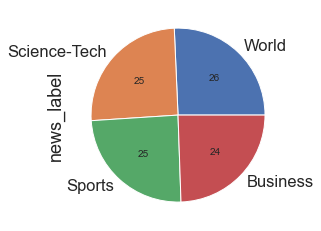

In [119]:
# Draw Pie chart using train_y
train_y.value_counts().plot(kind='pie',autopct='%1.0f')

#  1	World
#  2	Sports
#  3	Business
#  4	Science and Technology

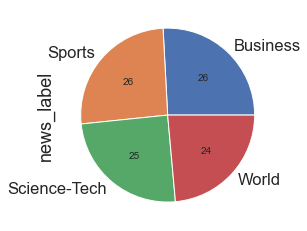

In [120]:
# Draw Pie chart using test_y
test_y.value_counts().plot(kind='pie',autopct='%1.0f')


In [121]:

train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))


In [122]:
# Import Libraries

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [123]:
#create the transform
new_vectorizer = CountVectorizer()

# tokenize and build vocabulary
new_vectorizer.fit(train_x)

# encode document train data
X_trained = new_vectorizer.transform(train_x)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (X_trained.shape)

# encode document test data
X_tested = new_vectorizer.transform(test_x)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (X_tested.shape)


(75000, 64875)
(24999, 64875)


In [124]:

#Transform a count matrix to a normalized tf-idf representation
get_tfidf = TfidfTransformer()

#tokenize and build vocabulary
get_tfidf.fit(X_trained)

#encode document test data
trained_tf_X = get_tfidf.transform(X_trained)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (trained_tf_X.shape)

#encode document train data
testes_tf_X = get_tfidf.transform(X_tested)

# Return a tuple representing the dimensionality(NoOfRows,NoOfCols) of the data frame 
print (testes_tf_X.shape)


(75000, 64875)
(24999, 64875)


In [125]:
#Convert series to list
train_content_array=train_x.tolist()
test_content_arrayr=test_x.tolist()
train_news_lbl = train_y.tolist()
test_news_lbl = test_y.tolist()


In [126]:
#Improve Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from pprint import pprint
import itertools
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.metrics import classification_report, confusion_matrix


# =============================================================

# 10.	Build Naïve Bayes model using the Train data

Naïve Bayes can be deveided in to Multinomial Naive Bayes and Bernoulli Nave Bayes so that we have created 
two separeded models for Multinomial and Bernoulli under question No 10

In the Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data and also It perform well in case of categorical input variables compared to numerical variable(s).Lets perform the model and see how the accuracy behave along with other classification models.

# Multinomial Naive Bayes

In [64]:
#Naive Bayes classifier for multinomial models
Multinomial_Naive_Bayes= MultinomialNB()

#fitting
Multinomial_Naive_Bayes.fit(trained_tf_X, train_news_lbl)

#Perform classification on an array of ypred
#ypred
ypred_Multinomial_Naive_Bayes = Multinomial_Naive_Bayes.predict(testes_tf_X)


# 11. a) Test Naive Bayes model using Test Data

Multinomial Naive Bayes using Test Data

In [65]:
print("First 20 actual News Genres")
test_y[:20]          


first 20 actual News Genres


75000          Sports
75001           World
75002        Business
75003    Science-Tech
75004          Sports
75005           World
75006    Science-Tech
75007    Science-Tech
75008        Business
75009        Business
75010        Business
75011        Business
75012    Science-Tech
75013          Sports
75014           World
75015          Sports
75016        Business
75017    Science-Tech
75018           World
75019           World
Name: news_label, dtype: object

In [66]:
print("first 20 predicted News Genres by Multinomial Naive Bayes Model")
print('--------------------------------------')

#Generate first 20 predicted news categories
for News_Genres in ypred_Multinomial_Naive_Bayes[:20]:
    print(News_Genres)

first 20 predicted News Genres by Multinomial Naive Bayes Model
--------------------------------------
Sports
World
Business
Science-Tech
Sports
World
Science-Tech
Science-Tech
Business
Business
Business
Business
Science-Tech
Sports
World
Sports
Business
Science-Tech
World
World


# 12 a).	Calculate the confusion matrix and identify the model performance.

In [67]:
#Call the function called classification_report() and pass the test values and predicted values to retrieve summary 
print(classification_report(test_news_lbl,ypred_Multinomial_Naive_Bayes))


              precision    recall  f1-score   support

    Business       0.89      0.84      0.86      6461
Science-Tech       0.86      0.88      0.87      6198
      Sports       0.96      0.97      0.96      6447
       World       0.89      0.92      0.90      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.90     24999
weighted avg       0.90      0.90      0.90     24999



# Function for evaluate of Multinomial Naive Baye model

In [123]:
print("F1 score of the Multinomial Naive Bayes model")
print(f1_score(test_news_lbl,ypred_Multinomial_Naive_Bayes,average='micro'))
print("\n")

#Set the accuracy
print ('Multinomial Naive Bayes accuracy score')
print (accuracy_score(test_news_lbl, ypred_Multinomial_Naive_Bayes))
print("\n")

#Calculate accuracy as percentage
print("Accuracy of the Multinomial Naive Bayes model in percentage")
print(round(accuracy_score(test_news_lbl,ypred_Multinomial_Naive_Bayes)*100,3),"%")

F1 score of the Multinomial Naive Bayes model
0.9015960638425538


Multinomial Naive Bayes accuracy score
0.9015960638425538


Accuracy of the Multinomial Naive Bayes model in percentage
90.16 %


#  Confusion Matrix - Multinomial Naive Baye

This function displays the confusion matrix of the Multinomial Naive Baye model

In [69]:
#Define a method called confusion_mat1
def Confusion_Matrix_Multinomial_Naive_Baye(color_code):
    
    
    MN_NB_confusion_matrix=confusion_matrix(test_y, ypred_Multinomial_Naive_Bayes)
    
    #Create data frame
    MN_NB_confusion_matrix=pd.DataFrame(MN_NB_confusion_matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    #set the font size of the graph
    sns.set(font_scale=1.5)
    #set the figure size
    plt.figure(figsize=(8,8));

    sns.heatmap(MN_NB_confusion_matrix, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    #set the x axis label
    plt.xlabel("Predicted News Genres");
    #set the y axis label
    plt.ylabel("Actual News Genres");


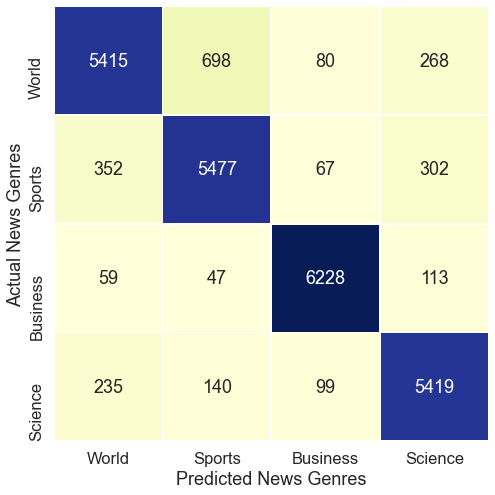

In [70]:
Confusion_Matrix_Multinomial_Naive_Baye('YlGnBu')

# -----------------------------------------------------------------------------------

# Bernoulli Nave Bayes

In [71]:
Bernoulli_Nave_Bayes= BernoulliNB()
#fitting
Bernoulli_Nave_Bayes.fit(trained_tf_X, train_news_lbl)
#ypred
ypred_Bernoulli_Nave_Bayes = Bernoulli_Nave_Bayes.predict(testes_tf_X)


# 11. b) Test Bernoulli Nave Bayes model using Test Data

In [72]:
print("first 20 actual News Genres")
test_y[:20]   

first 20 actual News Genres


75000          Sports
75001           World
75002        Business
75003    Science-Tech
75004          Sports
75005           World
75006    Science-Tech
75007    Science-Tech
75008        Business
75009        Business
75010        Business
75011        Business
75012    Science-Tech
75013          Sports
75014           World
75015          Sports
75016        Business
75017    Science-Tech
75018           World
75019           World
Name: news_label, dtype: object

In [73]:
print("first 20 predicted News Genres by Bernoulli Naive Bayes")
print('--------------------------------------')

for News_Genres in ypred_Bernoulli_Nave_Bayes[:20]:
    print(News_Genres)

first 20 predicted News Genres by Bernoulli Nave Bayes
--------------------------------------
Sports
World
Business
Science-Tech
Sports
World
Science-Tech
Science-Tech
Business
Business
Business
Business
Science-Tech
Sports
World
Sports
Business
Science-Tech
World
World


# 12 b).	Calculate the confusion matrix and identify the model performance.

In [74]:
# call the function and return summary 
print(classification_report(test_news_lbl,ypred_Bernoulli_Nave_Bayes))


              precision    recall  f1-score   support

    Business       0.89      0.83      0.86      6461
Science-Tech       0.85      0.88      0.87      6198
      Sports       0.96      0.97      0.96      6447
       World       0.89      0.91      0.90      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.90     24999
weighted avg       0.90      0.90      0.90     24999



# Function for evaluate of Bernoulli Nave Bayes model

In [75]:
print("F1 score of the Bernoulli Naive Bayes model")
print(f1_score(test_news_lbl,ypred_Bernoulli_Nave_Bayes,average='micro'))
print("\n")

print ('Bernoulli Naive Bayes model accuracy score')
print (accuracy_score(test_news_lbl, ypred_Bernoulli_Nave_Bayes))
print("\n")

print("Accuracy of the Bernoulli Naive Bayes model in percentage")
print(round(accuracy_score(test_news_lbl,ypred_Bernoulli_Nave_Bayes)*100,3),"%")




F1 score of the Bernoulli Nave Bayes model
0.8967958718348734


Bernoulli Nave Bayes model accuracy score
0.8967958718348734


Accuracy of the Bernoulli Nave Bayes model in percentage
89.68 %


Accuracy of the bernoulli Naive bayes model was less than the Multinomial naive bayes model

#  Confusion Matrix - Bernoulli Nave Bayes 

This function displays the confusion matrix of the MBernoulli Naive Bayes model

In [76]:
# Define a function called Confusion_Matrix_Bernoulli_Nave_Bayes

def Confusion_Matrix_Bernoulli_Nave_Bayes(color_code):
    
    #set expected value , predicted value and return the confution matrix
    Matrix=confusion_matrix(test_y, ypred_Bernoulli_Nave_Bayes)
    
    #Arrange data as a data frame
    Matrix=pd.DataFrame(Matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    
    #set the fon size
    sns.set(font_scale=1.5)
    
    #set the figure size
    plt.figure(figsize=(8,8));

    
    #set two-dimensional graphical representation according to colours
    sns.heatmap(Matrix, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    #x axis
    plt.xlabel("Predicted News Genres");
    
    #y axis
    plt.ylabel("Actual News Genres");


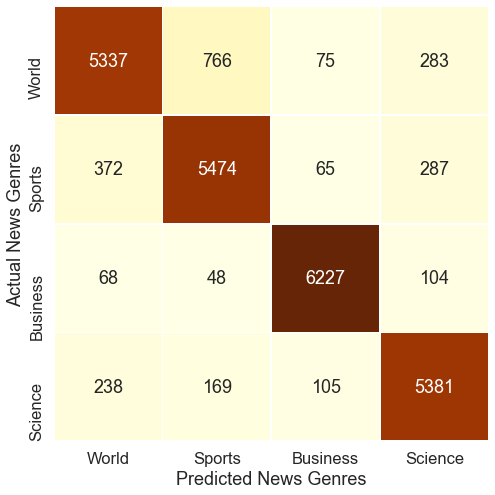

In [77]:
#Call the function
Confusion_Matrix_Bernoulli_Nave_Bayes('YlOrBr')

# ===============================================================

# 13.	Build K-NN model using the Train data and a random K value

# KNN - IT17167710 : Prathapa D.M.J

as we mentioned earler KNN also can be deveided in to Uniform KNN and Distant KNN so that we have created 
two separeded models for Uniform KNN and Distant KNN for KNN model under question No 13

# ------------------------------------------------------------------------------------------------------------

#  Uniform KNN

In [78]:
# Import Libraries
from sklearn.neighbors import KNeighborsClassifier


In [79]:
# Define knn parameters
Uniform_KNN = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')

#fitting
Uniform_KNN.fit(trained_tf_X, train_news_lbl)

#ypred
ypred_Uniform_KNN = Uniform_KNN.predict(testes_tf_X)


# 14. a) Test Uniform KNN model using Test Data

In [80]:
print("Actual News Genres from Row 5150 - 5170")
test_y[5150:5170]   


Actual News Genres from Row 5150 - 5170


80150          Sports
80151          Sports
80152          Sports
80153          Sports
80154          Sports
80155           World
80156        Business
80157    Science-Tech
80158    Science-Tech
80159    Science-Tech
80160          Sports
80161          Sports
80162           World
80163        Business
80164        Business
80165        Business
80166        Business
80167    Science-Tech
80168          Sports
80169          Sports
Name: news_label, dtype: object

In [81]:
print("predicted News Genre for Row 5150 - 5170")
print('--------------------------------------')

for News_Genre in ypred_Uniform_KNN[5150:5170]:
    print(News_Genre)
    

predicted News Genre for Row 5150 - 5170
--------------------------------------
Sports
Sports
Sports
Sports
Sports
World
Business
Science-Tech
Science-Tech
Science-Tech
Sports
Sports
World
Business
Business
Business
Business
Science-Tech
Sports
Sports


# 15 a). Calculate the confusion matrix and identify the model performance

In [82]:
print(classification_report(test_news_lbl,ypred_Uniform_KNN))


              precision    recall  f1-score   support

    Business       0.82      0.81      0.82      6461
Science-Tech       0.82      0.85      0.83      6198
      Sports       0.93      0.93      0.93      6447
       World       0.88      0.87      0.87      5893

    accuracy                           0.86     24999
   macro avg       0.86      0.86      0.86     24999
weighted avg       0.86      0.86      0.86     24999



# Functions for evaluate of Uniform KNN model

In [83]:
print("F1 score of the Uniform KNN model")
print(f1_score(test_news_lbl,ypred_Uniform_KNN,average='micro'))
print("\n")
print ('Uniform KNN model accuracy score')
print (accuracy_score(test_news_lbl, ypred_Uniform_KNN))
print("\n")
print("Accuracy of the Uniform KNN model in percentage")
print(round(accuracy_score(test_news_lbl,ypred_Uniform_KNN)*100,3),"%")


F1 score of the Uniform KNN model
0.8632345293811753


Uniform KNN model accuracy score
0.8632345293811753


Accuracy of the Uniform KNN model in percentage
86.323 %


# Confusion Matrix - Uniform KNN

In [84]:
#Define a function called Confusion_Matrix_Uniform_KNN

def Confusion_Matrix_Uniform_KNN(color_code):
    
    
    #Set the expected, predicted values as returns confusion matrix
    Matrix=confusion_matrix(test_y, ypred_Uniform_KNN)
    
    #Arrange Matrix as a data frame
    Matrix=pd.DataFrame(Matrix, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    
    #set the font size
    sns.set(font_scale=1.5)
    
    #set the figure size
    plt.figure(figsize=(8,8));

    
    #set two-dimensional graphical representation according to colours
    sns.heatmap(Matrix, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted News Genres");
    plt.ylabel("Actual News Genres");



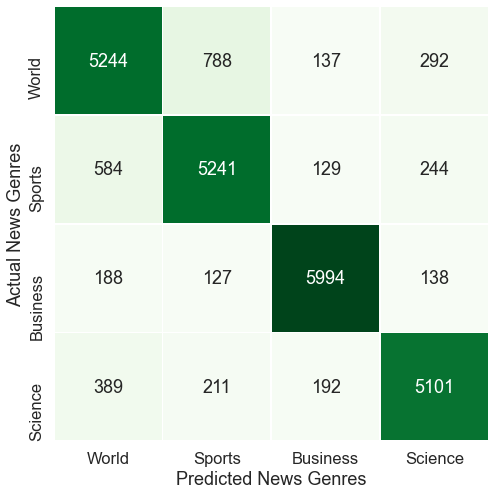

In [85]:
#call the function
Confusion_Matrix_Uniform_KNN('Greens')

# 16 a.	Select the best value for K. (Uniform KNN)

In [86]:
error_list=[]

for i in range(1,40):
   
    Uniform_KNN = KNeighborsClassifier(n_neighbors=i, weights = 'uniform')
    #fitting
    Uniform_KNN.fit(trained_tf_X, train_news_lbl)
    #ypred
    ypred_Uniform_KNN = Uniform_KNN.predict(testes_tf_X)

    error_list.append(np.mean(ypred_Uniform_KNN != test_news_lbl))
    

In [87]:
print(error_list)


[0.1702068082723309, 0.17460698427937119, 0.1469658786351454, 0.1438057522300892, 0.13676547061882474, 0.1344453778151126, 0.1314052562102484, 0.13040521620864834, 0.12748509940397615, 0.1262850514020561, 0.12412496499859994, 0.12372494899795992, 0.12296491859674387, 0.12276491059642386, 0.12308492339693587, 0.12260490419616785, 0.12204488179527181, 0.12168486739469579, 0.12132485299411977, 0.12184487379495179, 0.1220048801952078, 0.12216488659546382, 0.12136485459418377, 0.12064482579303172, 0.12168486739469579, 0.12088483539341574, 0.12152486099443978, 0.1203248129925197, 0.12144485779431177, 0.1218048721948878, 0.1218048721948878, 0.12152486099443978, 0.12116484659386376, 0.1204048161926477, 0.12084483379335173, 0.12136485459418377, 0.12120484819392775, 0.12128485139405576, 0.1219248769950798]


Text(0, 0.5, 'Mean Error')

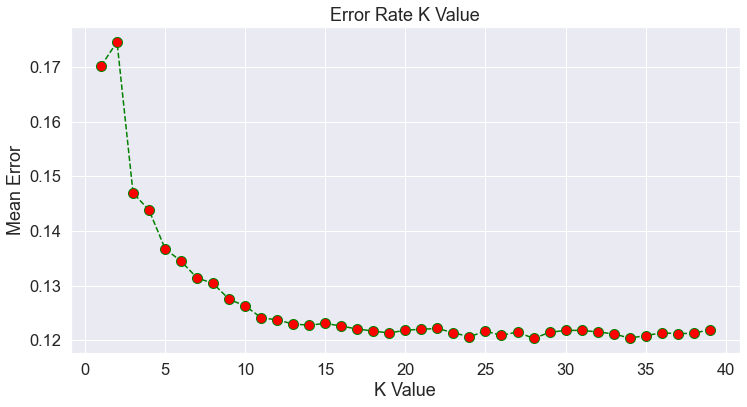

In [88]:
# Setting the width and height of the figure in inches
plt.figure(figsize=(12,6))
# Plot a Line graph of the error rate
plt.plot(range(1,40),error_list,color='green',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
# Title of graph
plt.title('Error Rate K Value')
# X axis
plt.xlabel('K Value')
# Y axis
plt.ylabel('Mean Error')


# by looking at the above graph we are assume that the best value K in Uniform KNN is = 18

In [89]:
# Classifier implementing the k-nearest neighbors vote
# n_neighbors:- Number of neighbors to use by default for kneighbors queries.
Uniform_KNN = KNeighborsClassifier(n_neighbors=18, weights = 'uniform') # uniform:-All points in each neighborhood are weighted equally.
#fitting
Uniform_KNN.fit(trained_tf_X, train_news_lbl)
#ypred
ypred_knn_uni_best  = Uniform_KNN.predict(testes_tf_X)


In [90]:
print(classification_report(test_news_lbl,ypred_knn_uni_best))


              precision    recall  f1-score   support

    Business       0.85      0.82      0.84      6461
Science-Tech       0.84      0.86      0.85      6198
      Sports       0.93      0.95      0.94      6447
       World       0.89      0.88      0.88      5893

    accuracy                           0.88     24999
   macro avg       0.88      0.88      0.88     24999
weighted avg       0.88      0.88      0.88     24999



# ------------------------------------------------------------------------------------------

# Distant KNN

In [91]:
# distance:- weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
Distant_KNN = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

#fitting
Distant_KNN.fit(trained_tf_X, train_news_lbl)

#ypred
ypred_Distant_KNN = Distant_KNN.predict(testes_tf_X)

# 14. b) Test Distant KNN model using Test Data

In [92]:
print("Actual News Genres from Row 1200 - 1220")
test_y[1200:1220]  


Actual News Genres from Row 1200 - 1220


76200    Science-Tech
76201    Science-Tech
76202    Science-Tech
76203          Sports
76204          Sports
76205          Sports
76206          Sports
76207           World
76208           World
76209        Business
76210    Science-Tech
76211        Business
76212    Science-Tech
76213          Sports
76214           World
76215           World
76216    Science-Tech
76217        Business
76218        Business
76219        Business
Name: news_label, dtype: object

In [93]:
print("Actual News Genres from Row 1200 - 1220")
print('--------------------------------------')
for i in ypred_Distant_KNN[1200:1220]:
    print(i)
    

Actual News Genres from Row 1200 - 1220
--------------------------------------
Science-Tech
Science-Tech
Science-Tech
Sports
Sports
Sports
Sports
World
Business
Business
Science-Tech
Business
Science-Tech
Sports
World
World
Science-Tech
Business
Business
Business


# 15 b). Calculate the confusion matrix and identify the model performance

In [94]:
print(classification_report(test_news_lbl,ypred_Distant_KNN))


              precision    recall  f1-score   support

    Business       0.83      0.80      0.82      6461
Science-Tech       0.83      0.84      0.83      6198
      Sports       0.93      0.93      0.93      6447
       World       0.87      0.88      0.87      5893

    accuracy                           0.86     24999
   macro avg       0.86      0.86      0.86     24999
weighted avg       0.86      0.86      0.86     24999



# Function for evaluate of Distant KNN model

In [95]:

print("F1 score of the Distant KNN ")
print(f1_score(test_news_lbl,ypred_Distant_KNN,average='micro'))
print("\n")
print ('Distant KNN accuracy score')
print (accuracy_score(test_news_lbl, ypred_Distant_KNN))
print("\n")
print("Accuracy of the Distant KNN  in percentage")
print(round(accuracy_score(test_news_lbl,ypred_Distant_KNN)*100,3),"%")


F1 score of the Distant KNN 
0.8643545741829674


Distant KNN accuracy score
0.8643545741829674


Accuracy of the Distant KNN  in percentage
86.435 %


# Confusion Matrix - Distant KNN

In [96]:
#Define a function called confusion_mat5
def Confusion_Matrix_Distant_KNN(color_code):
    confusion_matrix_DKNN=confusion_matrix(test_y, ypred_Distant_KNN)
    confusion_matrix_DKNN=pd.DataFrame(confusion_matrix_DKNN, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(confusion_matrix_DKNN, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted News Genres");
    plt.ylabel("Actual News Genres");



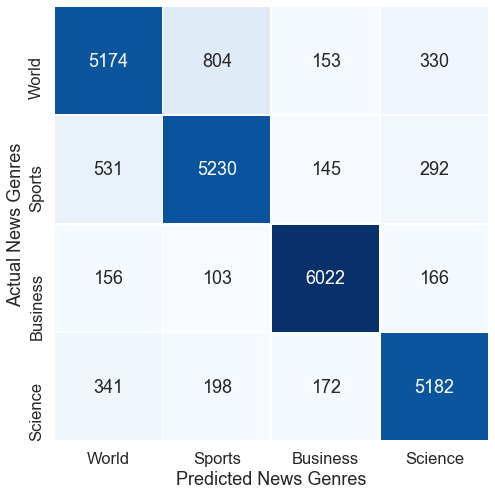

In [97]:
Confusion_Matrix_Distant_KNN('Blues')

# 16 b. Select the best value for K. (Distant KNN)

In [98]:
#create empty list call empty
error=[]

for i in range(1,40):
   
    knn_Distant = KNeighborsClassifier(n_neighbors=i, weights = 'distance')
    
    #fitting
    knn_Distant.fit(trained_tf_X, train_news_lbl)
    
    #ypred
    
    ypred_Distant_KNN = knn_Distant.predict(testes_tf_X)

    #Append mean value
    error.append(np.mean(ypred_Distant_KNN != test_news_lbl))

In [99]:
print(error)

[0.1702068082723309, 0.1702068082723309, 0.1452458098323933, 0.140445617824713, 0.13564542581703268, 0.13308532341293652, 0.13068522740909636, 0.12828513140525621, 0.12620504820192807, 0.12476499059962398, 0.12292491699667987, 0.1218848753950158, 0.12196487859514381, 0.12108484339373575, 0.12152486099443978, 0.12148485939437577, 0.12116484659386376, 0.12064482579303172, 0.12052482099283972, 0.1202848113924557, 0.12088483539341574, 0.12104484179367175, 0.12096483859354375, 0.12020480819232769, 0.12064482579303172, 0.12096483859354375, 0.12088483539341574, 0.1204048161926477, 0.12064482579303172, 0.12124484979399176, 0.12108484339373575, 0.12088483539341574, 0.12044481779271171, 0.11996479859194367, 0.12012480499219969, 0.12012480499219969, 0.1202448097923917, 0.12076483059322372, 0.12096483859354375]


Text(0, 0.5, 'Mean Error')

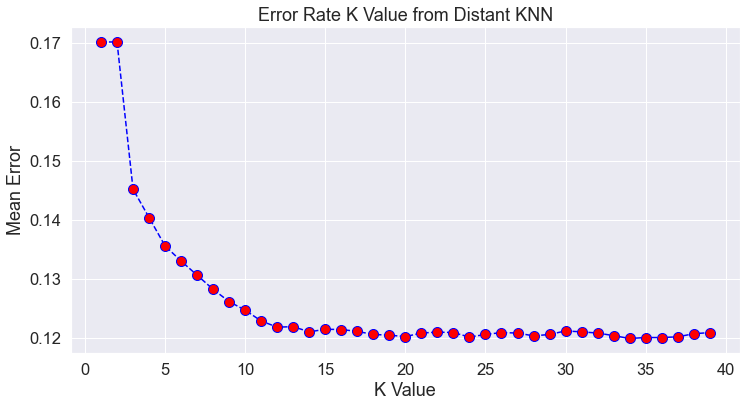

In [100]:
# Setting the width and height of the figure in inches
plt.figure(figsize=(12,6))
# Plot a Line graph of the error rate
plt.plot(range(1,40),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
# Title of graph
plt.title('Error Rate K Value from Distant KNN')
# X axis
plt.xlabel('K Value')
# Y axis
plt.ylabel('Mean Error')

# by looking at the above graph we are assume that the best value K in Distant KNN is = 20

In [101]:
knn_Distant = KNeighborsClassifier(n_neighbors=20, weights = 'distance')
#fitting
knn_Distant.fit(trained_tf_X, train_news_lbl)
#ypred
ypred_knn_Distant_best  = knn_Distant.predict(testes_tf_X)


In [102]:
print(classification_report(test_news_lbl,ypred_knn_Distant_best))


              precision    recall  f1-score   support

    Business       0.86      0.81      0.84      6461
Science-Tech       0.84      0.87      0.86      6198
      Sports       0.93      0.95      0.94      6447
       World       0.88      0.89      0.88      5893

    accuracy                           0.88     24999
   macro avg       0.88      0.88      0.88     24999
weighted avg       0.88      0.88      0.88     24999



# ===============================================================

# 17.	Build SVM model using Train Data

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method. A support vector machine is also known as a support vector network (SVN).

There are 2 types of support vector machine models,

    1)Linear SVM
    2)Non-Linear SVM

# Linear SVM

In [127]:
# Import Library
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn import svm

In [128]:
# Linear Support Vector Classification
support_vector_machine= LinearSVC()
#fitting
support_vector_machine.fit(trained_tf_X, train_news_lbl)
#ypred
ypred_support_vector_machine = support_vector_machine.predict(testes_tf_X)


# 18. Test SVM model using Test Data

In [129]:
# Display Actual News Genres from Row 50 to 70
print("Actual News Genres from Row 50 -70")
test_y[50:70]   


Actual News Genres from Row 50 -70


75050        Business
75051        Business
75052        Business
75053        Business
75054        Business
75055        Business
75056        Business
75057    Science-Tech
75058    Science-Tech
75059    Science-Tech
75060    Science-Tech
75061          Sports
75062          Sports
75063          Sports
75064          Sports
75065          Sports
75066          Sports
75067           World
75068        Business
75069        Business
Name: news_label, dtype: object

In [130]:
# Display Actual News Genres from Row 50 to 70
print("Actual News Genres from Row 50 -70")
print('--------------------------------------')
for i in ypred_support_vector_machine[50:70]:
    print(i)

Actual News Genres from Row 50 -70
--------------------------------------
Business
Business
Business
Business
Business
Business
Business
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Sports
Sports
Sports
Sports
Sports
Sports
World
Business
Business


# 19.	Calculate the confusion matrix and identify the model performance.

In [131]:
# Build a text report showing the main classification metrics.
# test_news_lbl:-Ground truth (correct) target values.
#ypred_support_vector_machine:-Estimated targets as returned by a classifier.

print(classification_report(test_news_lbl,ypred_support_vector_machine))

              precision    recall  f1-score   support

    Business       0.89      0.84      0.86      6461
Science-Tech       0.86      0.89      0.87      6198
      Sports       0.96      0.97      0.96      6447
       World       0.90      0.91      0.91      5893

    accuracy                           0.90     24999
   macro avg       0.90      0.90      0.90     24999
weighted avg       0.90      0.90      0.90     24999



# Function for evaluate of Linear SVM model

In [132]:
# Compute the F1 score, also known as balanced F-score or F-measure 
# test_news_lbl:- Ground truth (correct) target values.
# ypred_support_vector_machine:- Estimated targets as returned by a classifier.
# average='micro' :- Calculate metrics globally by counting the total true positives, false negatives and false positives.
print("F1 score of the Linear SVM model")
print(f1_score(test_news_lbl,ypred_support_vector_machine,average='micro'))
print("\n")

# Accuracy classification score.
# test_news_lbl:- Ground truth (correct) labels.
# ypred_support_vector_machine:- Predicted labels, as returned by a classifier.
print ('Linear Svm accuracy score')
print (accuracy_score(test_news_lbl, ypred_support_vector_machine))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the Linear SVM model in percentage")
print(round(accuracy_score(test_news_lbl,ypred_support_vector_machine)*100,3),"%")


F1 score of the Linear SVM model
0.9015960638425538


Linear Svm accuracy score
0.9015960638425538


Accuracy of the Linear SVM model in percentage
90.16 %


# Confusion Matrix - Linear SVM

In [133]:
# Define a function called Confusion_Matrix_Linear_SVM
def Confusion_Matrix_Linear_SVM(color_code):
    
    # Create confusion matrix
    # Compute confusion matrix to evaluate the accuracy of a classification.
    Confusion_Matrix_SVM=confusion_matrix(test_y, ypred_support_vector_machine)
    
    # Arrange as a data frame
    Confusion_Matrix_SVM=pd.DataFrame(Confusion_Matrix_SVM, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    
    # Set the font size
    sns.set(font_scale=1.5)
    
    # Set the figure size
    plt.figure(figsize=(8,8));
    
    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(Confusion_Matrix_SVM, cmap=color_code,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    
    # x-axis
    plt.xlabel("Predicted News Genres");
    # y-axis
    plt.ylabel("Actual News Genres");



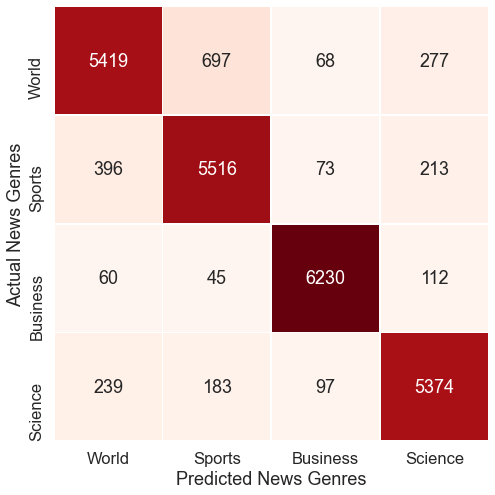

In [134]:
# Call to Confusion_Matrix_Linear_SVM Function
Confusion_Matrix_Linear_SVM('Reds')

# Non-Linear support vector machine

In [135]:
# non Linear Support Vector Classification
non_Linear_support_vector_machine= NuSVC()
#fitting
non_Linear_support_vector_machine.fit(trained_tf_X, train_news_lbl)
#ypred
ypred_support_vector_machine = non_Linear_support_vector_machine.predict(testes_tf_X)


In [136]:
# Display Actual News Genres from Row 50 to 70
print("Actual News Genres from Row 50 -70")
test_y[50:70]   

Actual News Genres from Row 50 -70


75050        Business
75051        Business
75052        Business
75053        Business
75054        Business
75055        Business
75056        Business
75057    Science-Tech
75058    Science-Tech
75059    Science-Tech
75060    Science-Tech
75061          Sports
75062          Sports
75063          Sports
75064          Sports
75065          Sports
75066          Sports
75067           World
75068        Business
75069        Business
Name: news_label, dtype: object

In [137]:
# Display Actual News Genres from Row 50 to 70
print("Actual News Genres from Row 50 -70")
print('--------------------------------------')
for i in ypred_support_vector_machine[50:70]:
    print(i)

Actual News Genres from Row 50 -70
--------------------------------------
Business
Business
Business
Business
Business
Business
Business
Science-Tech
Science-Tech
Science-Tech
Science-Tech
Sports
Sports
Sports
Sports
Sports
Sports
World
Business
Business


# Calculate the confusion matrix and identify the model performance

In [138]:
# Build a text report showing the main classification metrics.
# test_news_lbl:-Ground truth (correct) target values.
#ypred_support_vector_machine:-Estimated targets as returned by a classifier.

print(classification_report(test_news_lbl,ypred_support_vector_machine))

              precision    recall  f1-score   support

    Business       0.90      0.81      0.85      6461
Science-Tech       0.83      0.89      0.86      6198
      Sports       0.94      0.97      0.96      6447
       World       0.91      0.91      0.91      5893

    accuracy                           0.89     24999
   macro avg       0.90      0.90      0.89     24999
weighted avg       0.90      0.89      0.89     24999



# Function for evaluate of Non Linear SVM model

In [139]:
# Compute the F1 score, also known as balanced F-score or F-measure 
# test_news_lbl:- Ground truth (correct) target values.
# ypred_support_vector_machine:- Estimated targets as returned by a classifier.
# average='micro' :- Calculate metrics globally by counting the total true positives, false negatives and false positives.
print("F1 score of the model")
print(f1_score(test_news_lbl,ypred_support_vector_machine,average='micro'))
print("\n")

# Accuracy classification score.
# test_news_lbl:- Ground truth (correct) labels.
# ypred_support_vector_machine:- Predicted labels, as returned by a classifier.
print ('Non Linear svm accuracy score')
print (accuracy_score(test_news_lbl, ypred_support_vector_machine))
print("\n")

# Accuracy classification score in percentage.
print("Accuracy of the model in percentage")
print(round(accuracy_score(test_news_lbl,ypred_support_vector_machine)*100,3),"%")

F1 score of the model
0.8949157966318653


Non Linear svm accuracy score
0.8949157966318653


Accuracy of the model in percentage
89.492 %


In [140]:
# Build a text report showing the main classification metrics.
# test_news_lbl:-Ground truth (correct) target values.
#ypred_support_vector_machine:-Estimated targets as returned by a classifier.

print(classification_report(test_news_lbl,ypred_support_vector_machine))

              precision    recall  f1-score   support

    Business       0.90      0.81      0.85      6461
Science-Tech       0.83      0.89      0.86      6198
      Sports       0.94      0.97      0.96      6447
       World       0.91      0.91      0.91      5893

    accuracy                           0.89     24999
   macro avg       0.90      0.90      0.89     24999
weighted avg       0.90      0.89      0.89     24999



In [141]:
# Define a function called non_Linear_confusion
def non_Linear_confusion(color):
    # Create confusion matrix
    # Compute confusion matrix to evaluate the accuracy of a classification.
    cof=confusion_matrix(test_y, ypred_support_vector_machine)
    
    # Arrange as a data frame
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    
    # Set the font size
    sns.set(font_scale=1.5)
    
    # Set the figure size
    plt.figure(figsize=(8,8));

    # Plot rectangular data as a color-encoded matrix
    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    
    # x-axis
    plt.xlabel("Predicted Classes");
    # y-axis
    plt.ylabel("Actual Classes");

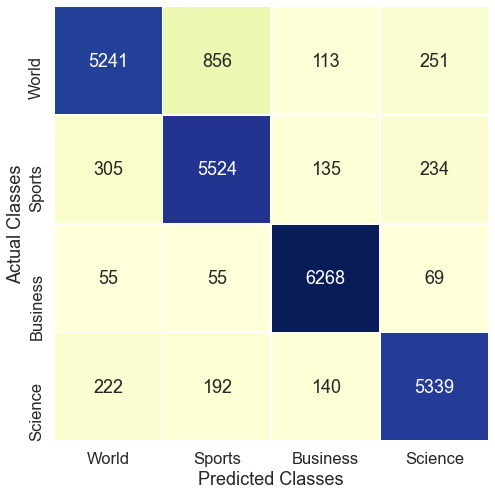

In [142]:
# Call to Confusion_Matrix_Linear_SVM Function
non_Linear_confusion('YlGnBu')

# 20.	Compare the model performance and select a best model and briefly discuss why this is the best model
When we choosed to best model,

1) In Naive Bayes we build two types of models called Multinomial Naive Bayes and Bernoulli Naive Bayes. According to those models best one is Multinomial Naive Bayes (Accuracy:- 90.16%)

2)In Support Vector Machine we build two types of models called Linear SVM and Non-Linear SVM. According to those models best one is Linear SVM (Accuracy:- 90.16%)

3)In K-NN we build two types of models called Linear Uniform K-NN and Distant K-NN. According to those models best one is Distant K-NN (Accuracy:- 87.97%)

Assessing the performance of these three models, Multinomial Naive Bayes Model and Linear SVM model considered to be the ideal selection for the new dataset since it helps to get the highest accuracy along with better value for true positive and negative values in contrast to the Bernoulli Naive Bayes, Non-Linear SVM, Uniform K-NN and Distant K-NN.

In [137]:
#Accuracy classification score
Nb1=round(accuracy_score(test_y,ypred_Multinomial_Naive_Bayes)*100,3)
Nb2 = round(accuracy_score(test_news_lbl,ypred_Bernoulli_Nave_Bayes)*100,3)
svm1 = round(accuracy_score(test_news_lbl,ypred_support_vector_machine)*100,3)
knn1 = round(accuracy_score(test_news_lbl,ypred_knn_uni_best)*100,3)
knn2= round(accuracy_score(test_news_lbl,ypred_knn_Distant_best)*100,3)

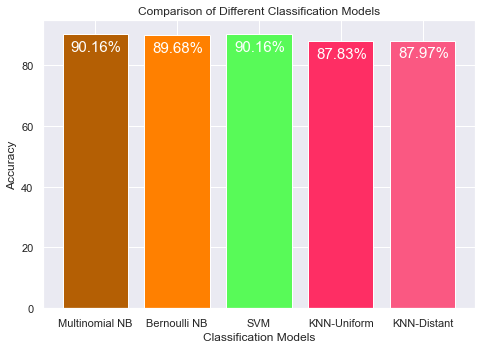

In [138]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Multinomial NB', 'Bernoulli NB', 'SVM', 'KNN-Uniform','KNN-Distant']
Accuracy=[Nb1,Nb2,svm1,knn1,knn2]
#Define colours to bars
ax.bar(Models,Accuracy,color=['#B45F04','#FF8000','#58FA58','#FE2E64','#FA5882']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');
plt.show();

# Content Catagory detector build by this analayes

We have implemented 2 models for KNN , among those 2 Uniform KNN has the best Acurecy

In [107]:
def predict_News_Genre(s):
    X_test_tf = new_vectorizer.transform([s])
    
    #predict the content by uniformed KNN
    KNN_predict = Distant_KNN.predict(X_test_tf)
    
    #predict the content by multi-Normal Naive bayes
    NB_predict = Multinomial_Naive_Bayes.predict(X_test_tf)
    
    #predict the content by SVM
    SWM_predict = support_vector_machine.predict(X_test_tf)
    
    
    return KNN_predict,NB_predict,SWM_predict

In [108]:
content = ''
print()
print(' Type quit if you want to Exit')
print('=================================')
print()
content = input("Input the Content That U want to Predict  : ")
while content != 'quit':
    print('===============================================')
    print()
    print('(1) the Predicted Result by KNN : ',predict_News_Genre(content)[0])
    print('----------------------------------------------------')
    print('(2) the Predicted Result by NB  : ',predict_News_Genre(content)[1])
    print('----------------------------------------------------')
    print('(3) the Predicted Result by SVM  : ',predict_News_Genre(content)[2])
    print()
    print('---------------------------------')
    content = input("Input the Content That U want to Predict - ")


 Type quit if you want to Exit

Input the Content That U want to tested  :     Brandix Official Statement on COVID-19 cluster in Minuwangoda Tue, Oct 6, 2020, 07:43 pm SL Time, ColomboPage News Desk, Sri Lanka. Oct 06, Colombo: Following initial identification of a COVID-19 infected employee Brandix has issued an official statement updating the public on the latest situation regarding the COVID-19 cluste

(1) the Predicted Result by KNN :  ['World']
----------------------------------------------------
(2) the Predicted Result by NB  :  ['World']
----------------------------------------------------
(3) the Predicted Result by SVM  :  ['World']

---------------------------------
Input the Content That U want to tested - Sangakkara is a cricket commentator, cricketer and former player and captain of the Sri Lanka national team. He is regarded as one of the greatest batsmen of all time. Sangakkara scored 28,016 runs in international cricket across

(1) the Predicted Result by KNN :  ['Spo

# 21. How can you improve the performance of your models?

Utilizing feature selection we could improve the performance as it helps to get top positive and negative word sets and predict the views based on those selected works. This would help to improve the overall accuracy.

Optimize the parameters 

Change the cross-validation cost function to suit your exact needs.

Reweighing training instances are important when your data set is unbalanced (e.g. some classes have a lot less instances than others). You can do this with the -wX options in libsvm.

RBF kernel is a good choice if your data is not structured.

Preprocessing should be improved, perhaps tailor new aggregated features based on domain knowledge.

Tune tf-idf formular.(sublinear tf, smooth_idf)

Data should be properly scaled. Scale the training set only and then use exactly the same parameters to scale the test set.

Normalize the samples with l1/l2 normalization